In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_15_equil_fixI0"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.05701986106837,0.21995458274865,1178673.92590009,2027782.04288505,0,0.0903252122150038,0.142729740714773,-1246.29034298318,2537.27514834671,2016-02-23T00:28:51+01:00
1,-0.184330057691685,0.209572547122396,-5588038.14263177,2175824.99202788,1,0.0912233943595732,0.153006122391835,-634.598236399737,2704.14690102108,2016-02-23T00:29:03+01:00
2,-0.0220619744428348,0.226397132972902,-4046899.53803007,2318982.58536687,2,0.0703960857531606,0.163112731319638,-693.452218390036,2883.99327524288,2016-02-23T00:29:14+01:00
3,-0.0665213301889933,0.218139050436,-4157711.9459769,2220026.79794831,3,0.0829356879512693,0.156166327765794,-1044.7364072035,2761.75730438174,2016-02-23T00:29:25+01:00
4,-0.187177652785068,0.214674796739693,-5369353.60203014,2160734.93422483,4,0.127008267100961,0.152017924098033,-242.48805347459,2689.42179892159,2016-02-23T00:29:36+01:00
5,-0.0676106138192724,0.212640884554265,-5694442.79532082,2173475.12134633,5,0.15950538063192,0.152882450740651,-904.110147872923,2703.26085519091,2016-02-23T00:29:48+01:00
6,0.0387889178397974,0.216864854621557,-5660843.83026063,2179741.47867833,6,0.127950671330374,0.153356982600719,-789.540345304172,2713.24457477469,2016-02-23T00:29:59+01:00
7,-0.356637425100813,0.218932093339141,-6881664.62909961,2234093.58338283,7,0.263950634099338,0.157149943161484,-578.361354118091,2778.86537773698,2016-02-23T00:30:10+01:00
8,-0.0263870068007367,0.222900662495094,-5248865.77861475,2193676.46162332,8,0.500546094119627,0.154467856455019,-610.592874024731,2733.43030775245,2016-02-23T00:30:21+01:00
9,0.0960093588519055,0.220038861946352,-5829197.08132597,2208508.01779398,9,0.540113672908871,0.155488323275007,-238.722800716151,2749.17654783035,2016-02-23T00:30:32+01:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.103234817670103,0.239261520276635,-3753890.46855094,2288664.7350101,59,8.1610714603214,0.162809167500253,-421.384197481747,2855.62599393767,2016-02-23T00:40:04+01:00
1,0.313781780056428,0.257962333806062,-4780403.93966961,2459567.85998248,60,25.8836383592518,0.17948772305432,2056.14852958026,3067.53752816611,2016-02-23T00:40:15+01:00
2,0.264434942123003,0.270748845587246,-3914567.62300344,2580036.48739054,61,26.4353590508074,0.188628800373239,1901.06299919152,3217.74337409994,2016-02-23T00:40:25+01:00
3,0.341419149288577,0.257094577242555,-3644986.61124158,2451701.94077502,62,26.3252581823378,0.179220203842435,2254.29044349418,3057.53683347121,2016-02-23T00:40:35+01:00
4,0.222462112264572,0.264463102337196,-4571935.58300992,2521087.17485961,63,26.2836202953336,0.184279853130334,2749.00910868638,3144.14018485296,2016-02-23T00:40:46+01:00
5,0.382430558996797,0.268740220963358,-4656001.30334258,2563104.07930391,64,26.3537680830655,0.187369131095902,1343.05381610077,3196.4475936841,2016-02-23T00:40:56+01:00
6,0.303269084696721,0.257943702481795,-2853912.19267915,2460489.6557962,65,26.3913526027485,0.179879776907324,2466.99086172756,3068.39832471504,2016-02-23T00:41:06+01:00
7,0.114882961846316,0.264988612611995,-4882587.35415333,2526878.76825369,66,26.2783025596061,0.184701196262687,1546.60642985989,3151.31565150289,2016-02-23T00:41:16+01:00
8,0.349491392953432,0.25393718240607,-4126323.11312571,2421159.76058986,67,26.4542726549383,0.177021113183725,1499.26630369187,3019.47678434632,2016-02-23T00:41:27+01:00
9,0.149011748129719,0.272957178081736,-2741270.18933144,2605351.36652748,68,26.4618562300763,0.190489637315663,1740.76878891268,3248.95871114752,2016-02-23T00:41:37+01:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.05701986106837,0.21995458274865,1178673.92590009,2027782.04288505,0,0.0903252122150038,0.142729740714773,-1246.29034298318,2537.27514834671,2016-02-23T00:28:51+01:00
1,-0.184330057691685,0.209572547122396,-5588038.14263177,2175824.99202788,1,0.0912233943595732,0.153006122391835,-634.598236399737,2704.14690102108,2016-02-23T00:29:03+01:00
2,-0.0220619744428348,0.226397132972902,-4046899.53803007,2318982.58536687,2,0.0703960857531606,0.163112731319638,-693.452218390036,2883.99327524288,2016-02-23T00:29:14+01:00
3,-0.0665213301889933,0.218139050436,-4157711.9459769,2220026.79794831,3,0.0829356879512693,0.156166327765794,-1044.7364072035,2761.75730438174,2016-02-23T00:29:25+01:00
4,-0.187177652785068,0.214674796739693,-5369353.60203014,2160734.93422483,4,0.127008267100961,0.152017924098033,-242.48805347459,2689.42179892159,2016-02-23T00:29:36+01:00
5,-0.0676106138192724,0.212640884554265,-5694442.79532082,2173475.12134633,5,0.15950538063192,0.152882450740651,-904.110147872923,2703.26085519091,2016-02-23T00:29:48+01:00
6,0.0387889178397974,0.216864854621557,-5660843.83026063,2179741.47867833,6,0.127950671330374,0.153356982600719,-789.540345304172,2713.24457477469,2016-02-23T00:29:59+01:00
7,-0.356637425100813,0.218932093339141,-6881664.62909961,2234093.58338283,7,0.263950634099338,0.157149943161484,-578.361354118091,2778.86537773698,2016-02-23T00:30:10+01:00
8,-0.0263870068007367,0.222900662495094,-5248865.77861475,2193676.46162332,8,0.500546094119627,0.154467856455019,-610.592874024731,2733.43030775245,2016-02-23T00:30:21+01:00
9,0.0960093588519055,0.220038861946352,-5829197.08132597,2208508.01779398,9,0.540113672908871,0.155488323275007,-238.722800716151,2749.17654783035,2016-02-23T00:30:32+01:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:21364540 @name = nil @size = 10 >
                                      nil
                   0 2016-02-23T00:28:51+
                   1 2016-02-23T00:29:03+
                   2 2016-02-23T00:29:14+
                   3 2016-02-23T00:29:25+
                   4 2016-02-23T00:29:36+
                   5 2016-02-23T00:29:48+
                   6 2016-02-23T00:29:59+
                   7 2016-02-23T00:30:10+
                   8 2016-02-23T00:30:21+
                   9 2016-02-23T00:30:32+

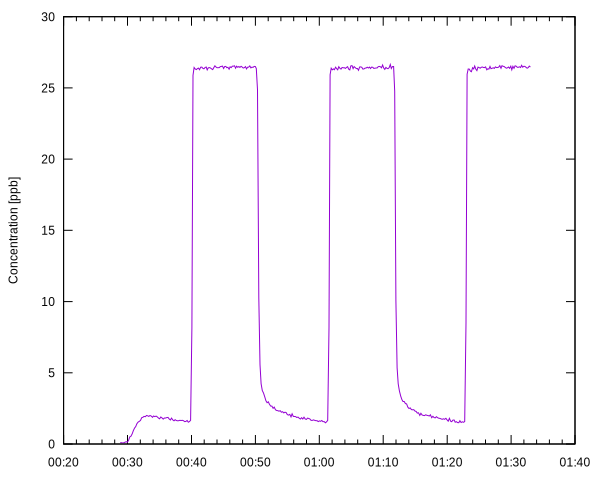

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-23T00:28:51+01:00,-0.05701986106837,0.21995458274865,1178673.92590009,2027782.04288505,0,0.0903252122150038,0.142729740714773,-1246.29034298318,2537.27514834671,2016-02-23T00:28:51+01:00,0.0
2016-02-23T00:29:03+01:00,-0.184330057691685,0.209572547122396,-5588038.14263177,2175824.99202788,1,0.0912233943595732,0.153006122391835,-634.598236399737,2704.14690102108,2016-02-23T00:29:03+01:00,11.999999999999998
2016-02-23T00:29:14+01:00,-0.0220619744428348,0.226397132972902,-4046899.53803007,2318982.58536687,2,0.0703960857531606,0.163112731319638,-693.452218390036,2883.99327524288,2016-02-23T00:29:14+01:00,23.0
2016-02-23T00:29:25+01:00,-0.0665213301889933,0.218139050436,-4157711.9459769,2220026.79794831,3,0.0829356879512693,0.156166327765794,-1044.7364072035,2761.75730438174,2016-02-23T00:29:25+01:00,34.0
2016-02-23T00:29:36+01:00,-0.187177652785068,0.214674796739693,-5369353.60203014,2160734.93422483,4,0.127008267100961,0.152017924098033,-242.48805347459,2689.42179892159,2016-02-23T00:29:36+01:00,45.0
2016-02-23T00:29:48+01:00,-0.0676106138192724,0.212640884554265,-5694442.79532082,2173475.12134633,5,0.15950538063192,0.152882450740651,-904.110147872923,2703.26085519091,2016-02-23T00:29:48+01:00,57.00000000000001
2016-02-23T00:29:59+01:00,0.0387889178397974,0.216864854621557,-5660843.83026063,2179741.47867833,6,0.127950671330374,0.153356982600719,-789.540345304172,2713.24457477469,2016-02-23T00:29:59+01:00,68.0
2016-02-23T00:30:10+01:00,-0.356637425100813,0.218932093339141,-6881664.62909961,2234093.58338283,7,0.263950634099338,0.157149943161484,-578.361354118091,2778.86537773698,2016-02-23T00:30:10+01:00,79.0
2016-02-23T00:30:21+01:00,-0.0263870068007367,0.222900662495094,-5248865.77861475,2193676.46162332,8,0.500546094119627,0.154467856455019,-610.592874024731,2733.43030775245,2016-02-23T00:30:21+01:00,90.0
2016-02-23T00:30:32+01:00,0.0960093588519055,0.220038861946352,-5829197.08132597,2208508.01779398,9,0.540113672908871,0.155488323275007,-238.722800716151,2749.17654783035,2016-02-23T00:30:32+01:00,101.0


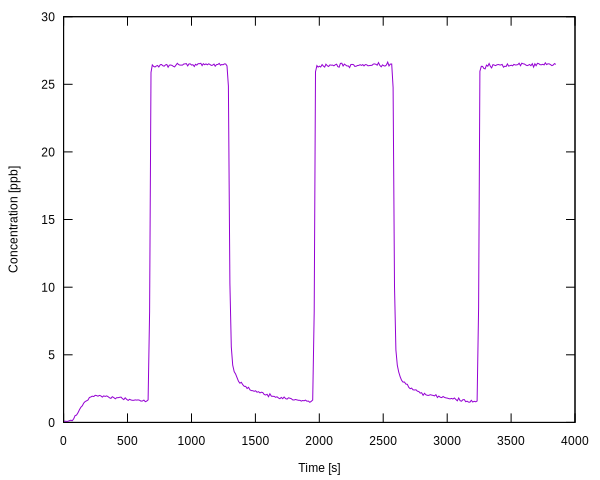

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

59
1.6645274983723
60
8.1610714603214
120
24.8685599961711
179
1.65844437569653
180
8.17263166582679
240
24.7599816817045
299
1.58277687760059
300
8.48614330537185


In [11]:
ts_fit = ts.row[120..178]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
120,0.282284995462304,0.267055830853326,-5465909.14535275,2548179.58382946,60,24.8685599961711,0.185606425400107,2362.68190153077,3178.04916965937,2016-02-23T00:50:20+01:00,0.0
121,0.153647393027891,0.238623280197746,-5854705.31884573,2275271.68636929,61,10.2750358899015,0.162407167776297,61.8075762364983,2839.25834675048,2016-02-23T00:50:32+01:00,12.0
122,0.0691965014961002,0.224223695276504,-4873524.13005132,2147559.36684625,62,5.57542892696221,0.152262024868828,-305.24724057137,2679.58226859728,2016-02-23T00:50:43+01:00,23.0
123,0.0713493825924385,0.232593457323006,-5490447.70817347,2226480.54119809,63,4.23617831705852,0.157571331999831,-1155.62455081909,2778.26290294766,2016-02-23T00:50:54+01:00,34.0
124,0.218561319667902,0.231186037585315,-4844290.57589691,2227219.64330322,64,3.74692593667527,0.157515260698159,-85.1170587961004,2778.17809772637,2016-02-23T00:51:05+01:00,44.99999999999977
125,-0.0275131586034038,0.237028584027863,-5487118.93977216,2277366.15704091,65,3.58036083332715,0.161028198363919,280.314494996273,2841.18755466474,2016-02-23T00:51:16+01:00,56.0
126,-0.185184941628523,0.23891358892819,-4241332.53564932,2287954.53707993,66,3.29767370941927,0.161720413503761,-1379.46642370113,2854.99958402175,2016-02-23T00:51:28+01:00,67.99999999999977
127,0.0167163199863477,0.229789947662641,-4765465.35996502,2199322.81048506,67,3.03786965832724,0.155403471911919,-188.387357417924,2744.5366581366,2016-02-23T00:51:39+01:00,79.0
128,0.0385894471115993,0.240028103074774,-5104260.65230024,2292799.87583634,68,2.90204957414924,0.161982559551558,-547.567145262789,2861.54218018553,2016-02-23T00:51:50+01:00,89.99999999999977
129,-0.126571682002645,0.227839118676494,-4525691.69281596,2180946.41295374,69,2.96549405905082,0.154090118899342,-481.137796895947,2721.57944527372,2016-02-23T00:52:01+01:00,101.0


In [12]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [13]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 2.99301 + -0.00259249*x + 21.8251*exp(-x/11.2061) "

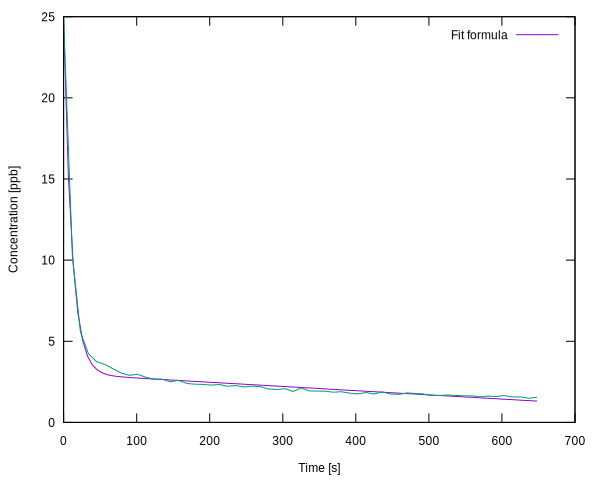

In [14]:
plot_fit << fit[:formula_ds]

In [15]:
ts_fit2 = ts.row[240..289]
ts_fit2[:s] = ts_fit2[:s] - ts_fit2[:s].first
plot_fit2 = Plot.new(
  [ts_fit2[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [16]:
fit2= fit(ts_fit2[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit2[:formula_ds].data

" 3.033 + -0.00295351*x + 21.669*exp(-x/10.0974) "

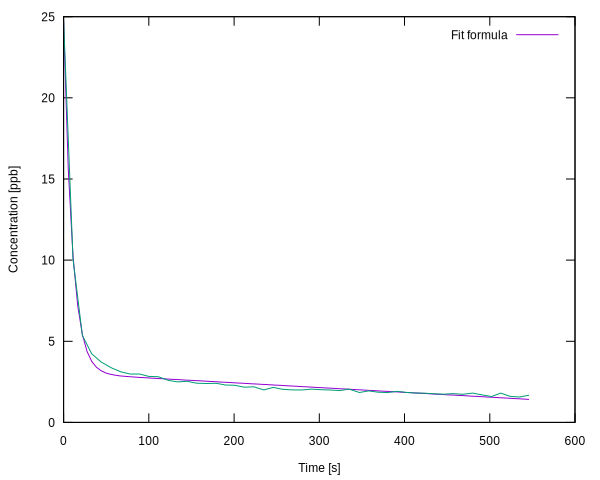

In [17]:
plot_fit2 << fit2[:formula_ds]

In [18]:
ts_fit3 = ts.row[59..119]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [19]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 26.5219 + -26.4668*exp(-x/14.584) "

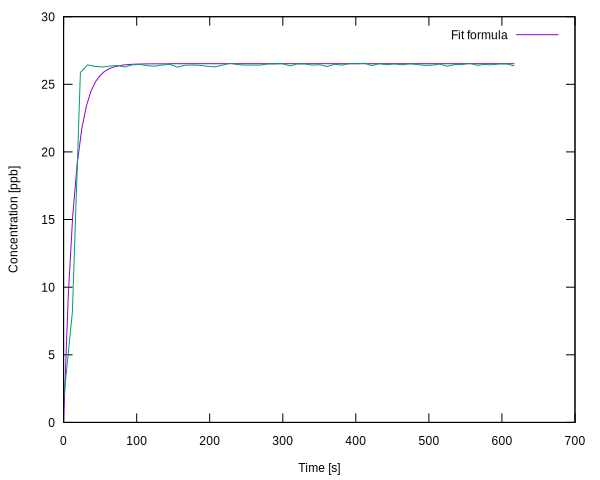

In [20]:
plot_fit3 << fit3[:formula_ds]

In [21]:
ts_fit4 = ts.row[179..239]
ts_fit4[:s] -= ts_fit4[:s].first
plot_fit4 = Plot.new(
  [ts_fit4[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [22]:
fit4 = fit(ts_fit4[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit4[:formula_ds].data

" 26.4969 + -26.3966*exp(-x/14.341) "

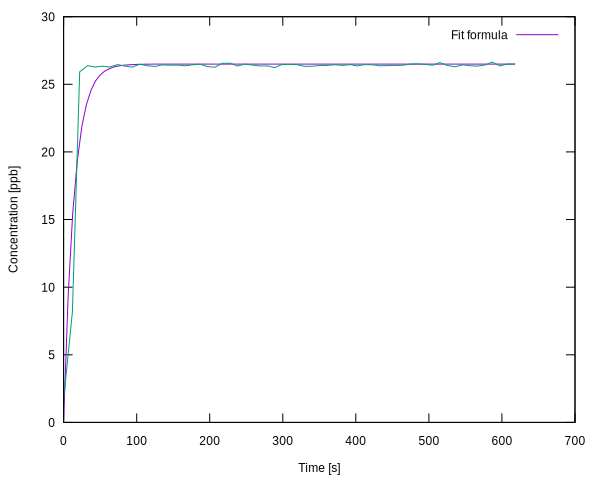

In [23]:
plot_fit4 << fit4[:formula_ds]

In [24]:
ts_fit5 = ts.row[299..(ts.nrows - 1)]
ts_fit5[:s] -= ts_fit5[:s].first
plot_fit5 = Plot.new(
  [ts_fit5[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [25]:
fit5 = fit(ts_fit5[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit5[:formula_ds].data

" 26.5105 + -26.4113*exp(-x/14.232) "

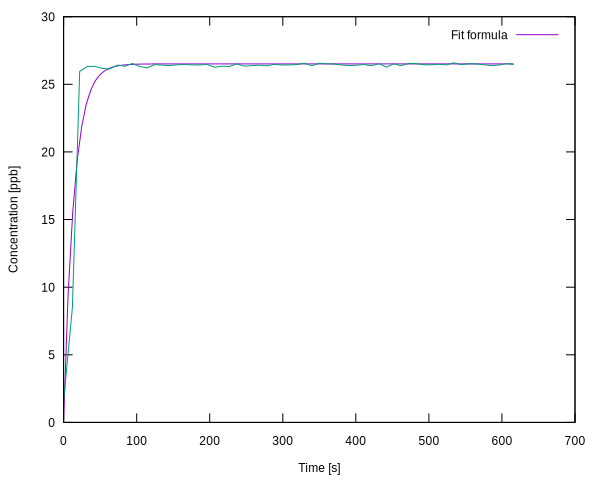

In [26]:
plot_fit5 << fit5[:formula_ds]

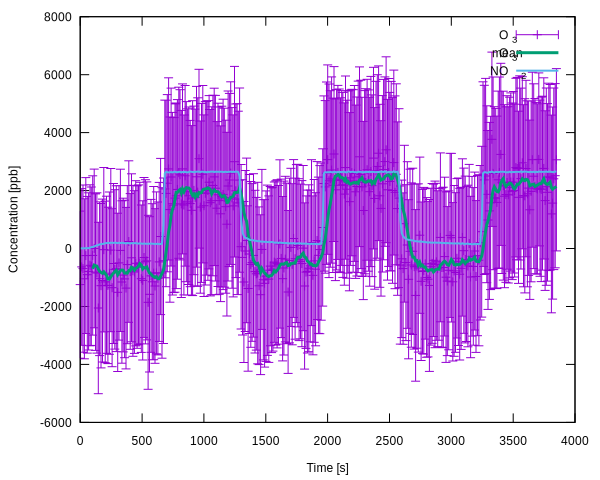

In [27]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [28]:
fit5[:coefficients]

{:a=>26.5105, :b=>-26.4113, :t=>14.232}

In [29]:
fit5[:deltas]

{:a=>0.158, :b=>1.161, :t=>1.246}